In [1]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

In [2]:
'''
Exact propagation in 2D. 
Pure python loops. First attempt at getting the logic correctly, optimized using cython/numba later.
'''
def exact_prop_2D(in_wave,out_wave,L_in,L_out,wavel,z):
    pi = np.pi
    
    '''
    Build the input and output domains from the input
    '''
    N_in_x = np.shape(in_wave)[0]
    N_in_y = np.shape(in_wave)[1]
    in_domain_x = np.linspace(-L_in/2,L_in/2,N_in_x)
    in_domain_y = np.linspace(-L_in/2,L_in/2,N_in_y)
    
    
    N_out_x = np.shape(out_wave)[0]
    N_out_y = np.shape(out_wave)[1]
    out_domain_x = np.linspace(-L_out/2,L_out/2,N_out_x)
    out_domain_y = np.linspace(-L_out/2,L_out/2,N_out_y)
    
    step_in_x = L_in/N_in_x
    step_in_y = L_in/N_in_y
    X_in,Y_in = np.meshgrid(in_domain_x,in_domain_y)
    '''
    Outer loops over i,j -> loop over output array
    Inner loops over p,q -> loop over input array
    For each ouput point, calculate the contribution from each input point and sum 
    '''
    fac = ((-1j*pi)/(wavel*z))
    for i in range(N_out_x):
        for j in range(N_out_y):
            x1 = out_domain_x[i]
            y1 = out_domain_y[j]
            out_wave[i][j] = ne.evaluate('sum(in_wave*exp(fac*((X_in-x1)**2+(Y_in-y1)**2)))')
    '''
    Finally scale the output
    '''
    out_wave *= ((1/np.sqrt(1j*wavel*z))*step_in_x)*((1/np.sqrt(1j*wavel*z))*step_in_y)
    return

In [3]:
wavel = 0.5*10**(-6)
pi = np.pi
z = 100000
N = 100
L_in  = 5e-1

in_wave = np.zeros((N,N))
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8),int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave = np.zeros((100,100),dtype='complex128')

In [4]:
exact_prop_2D(in_wave,out_wave,L_in,L_in,wavel,z)

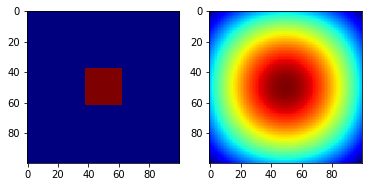

In [5]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(np.abs(in_wave),cmap='jet')
ax2.imshow(np.abs(out_wave),cmap='jet')
plt.show()

In [6]:
%timeit exact_prop_2D(in_wave,out_wave,L_in,L_in,wavel,z)

9.54 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
